# View Calspec individual SED 

- Author Sylvie Dagoret-Campagne
- Creation : 25 june 2021
- Last verification : December 14th 2021 --> OK correct something related to string for python 3.9

In [1]:
import os
import numpy as np

In [2]:
from astropy.table import Table
from astropy.io import fits

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [4]:
import pysynphot as S

In [5]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [6]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(24,18)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

# Read the Table

In [7]:
t=Table.read('table_summary_allcalspec.fits')
#t=Table.read('table_summary_calspec_hd.fits')  # view only HD type stars

In [8]:
t['magU'].format = "%3.3f" 
t['magB'].format = "%3.3f"  
t['magV'].format = "%3.3f"  
t['magR'].format = "%3.3f"  
t['magI'].format = "%3.3f"  

In [9]:
t.show_in_notebook()

idx,OBJNAME,RA,DEC,SP_TYPE,SP_QUAL,magU,magB,magV,magR,magI,FILES
0,109VIR,221.562,1.893,A0IIInn,C,3.690,3.720,3.730,3.660,3.680,109vir_stis_002.fits
1,10LAC,339.815,39.050,O9V,C,3.650,4.670,4.880,4.980,5.190,10lac_stis_005.fits
2,16CYGB,295.455,50.525,--,--,--,--,--,--,--,16cygb_stis_002.fits
3,18SCO,243.905,-8.369,G2Va,B,--,6.150,5.500,--,--,18sco_stis_002.fits
4,HD172167,279.235,38.784,A0Va,C,0.030,0.030,0.030,0.070,0.100,alpha_lyr_stis_010.fits
5,BD11D3759,218.570,-12.520,M3.5V,C,14.041,12.915,11.317,10.093,8.473,bd11d3759_stis_002.fits
6,ETA1DOR,91.539,-66.040,A0V,C,--,5.679,5.690,--,--,eta1dor_stis_002.fits
7,FEIGE110,349.993,-5.166,sdO8VIIIHe5,B,10.360,11.450,11.500,11.970,12.145,feige110_stisnic_008.fits
8,FEIGE34,159.903,43.103,sdOp,D,9.613,10.910,11.140,11.319,11.464,feige34_stis_006.fits
9,FEIGE66,189.348,25.067,sdB1(k),C,9.117,10.260,10.590,10.642,10.809,feige66_002.fits


In [10]:
t['magU'][np.where(t['magU'] > 1000)] = -100.
t['magB'][np.where(t['magB'] > 1000)] = -100.
t['magV'][np.where(t['magV'] > 1000)] = -100.
t['magR'][np.where(t['magR'] > 1000)] = -100.
t['magI'][np.where(t['magI'] > 1000)] = -100.

In [11]:
NBFILES=len(t)

In [12]:
dec=t["DEC"]

In [13]:
index_south_hemisphere=np.where(dec<0)[0]
index_south_hemisphere

array([ 3,  5,  6,  7, 13, 15, 17, 18, 19, 20, 21, 23, 24, 27, 28, 31, 34,
       36, 37, 38, 40, 42, 43, 45, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73])

In [14]:
# A flag to turn off plotting calspec
# In some cases the flag VISIBILITY may correspond to a flag saying if the star is visible
FLAG_VISIBILITY= np.array([False] * len(t))
FLAG_VISIBILITY[index_south_hemisphere]=True

In [15]:
FLAG_VISIBILITY

array([False, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False,  True, False, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False])

In [16]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBFILES), alpha=1)

# Flux in linear scale

In [25]:
import re

----------- 18sco_stis_002.fits -------------------
Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


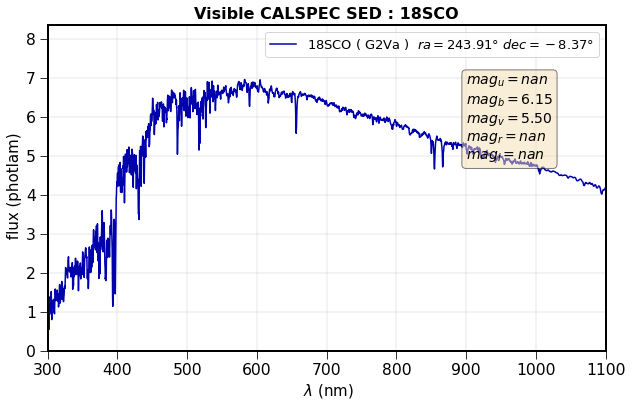

----------- bd11d3759_stis_002.fits -------------------
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.


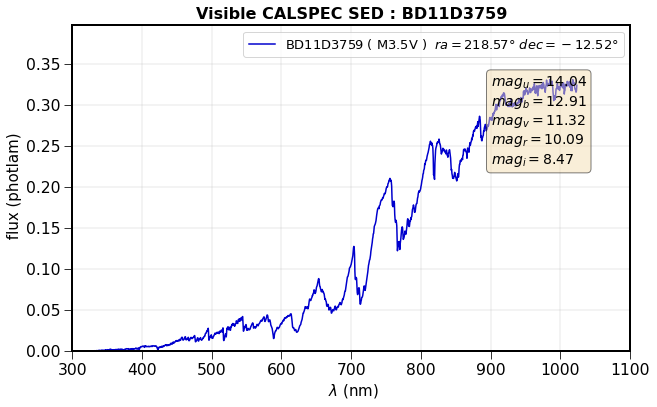

----------- eta1dor_stis_002.fits -------------------


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


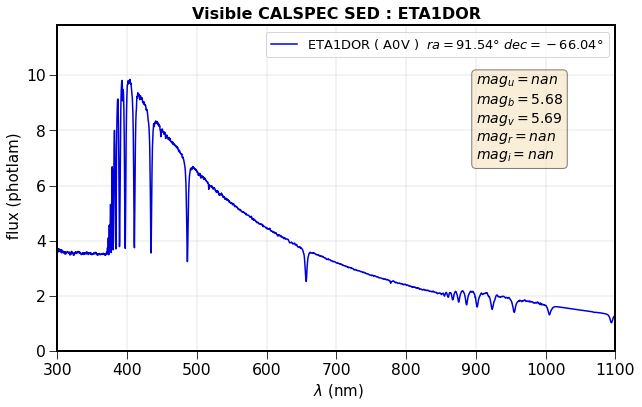

----------- feige110_stisnic_008.fits -------------------


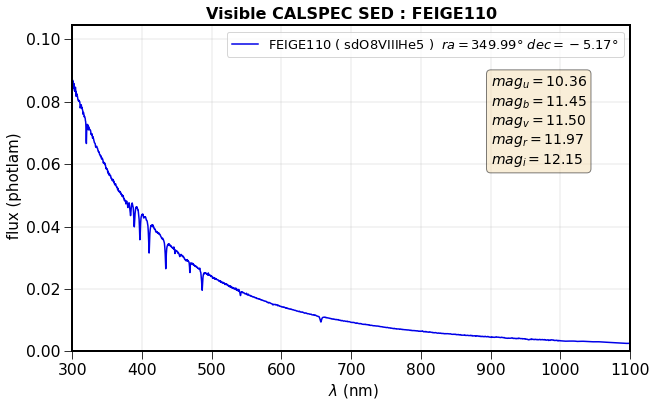

----------- gd108_005.fits -------------------


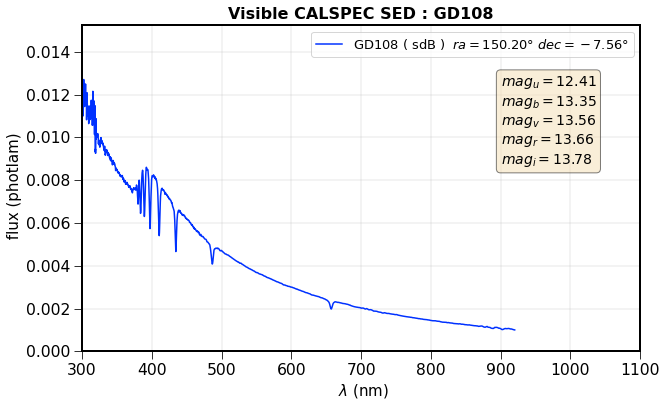

----------- gd50_004.fits -------------------


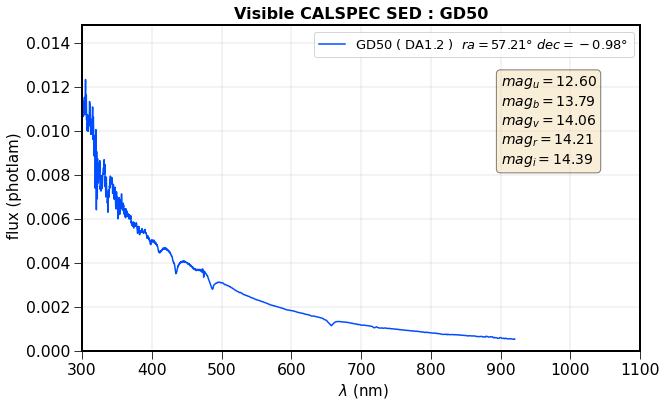

----------- gj7541a_stis_004.fits -------------------


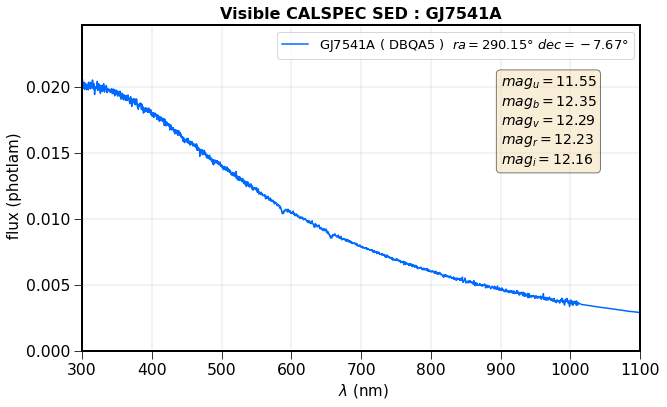

----------- hd009051_stis_005.fits -------------------
Warning, 17 of 6234 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


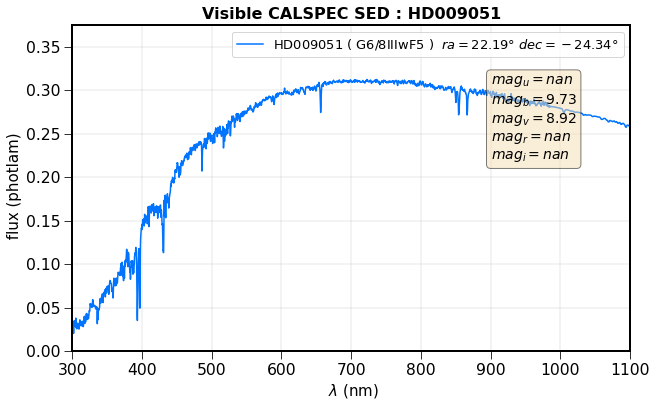

----------- hd031128_stis_005.fits -------------------
Warning, 1 of 6256 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


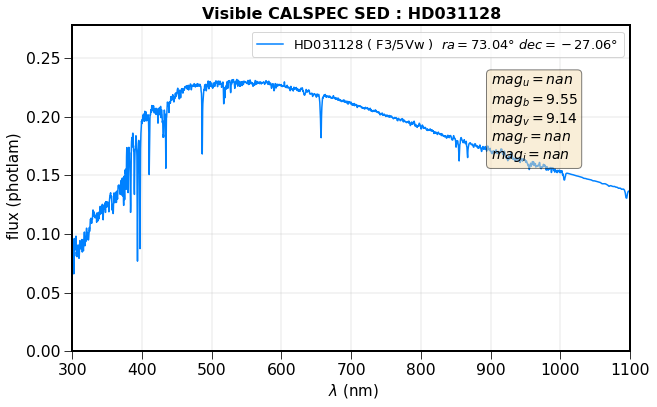

----------- hd074000_stis_005.fits -------------------


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


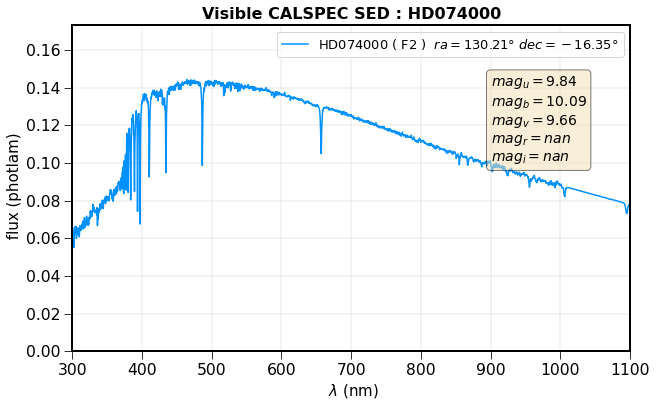

----------- hd101452_stis_002.fits -------------------


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


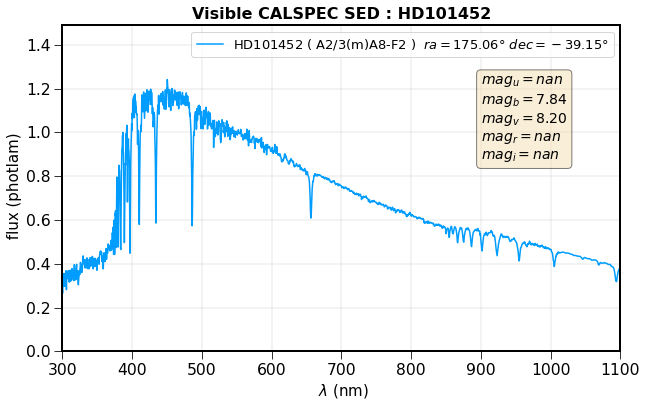

----------- hd111980_stis_005.fits -------------------


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


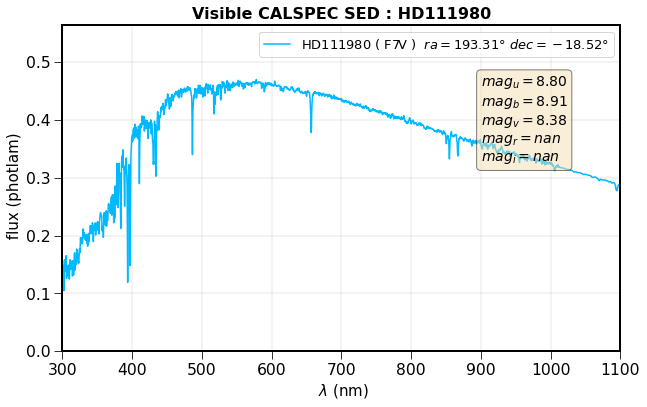

----------- hd115169_stis_002.fits -------------------
Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


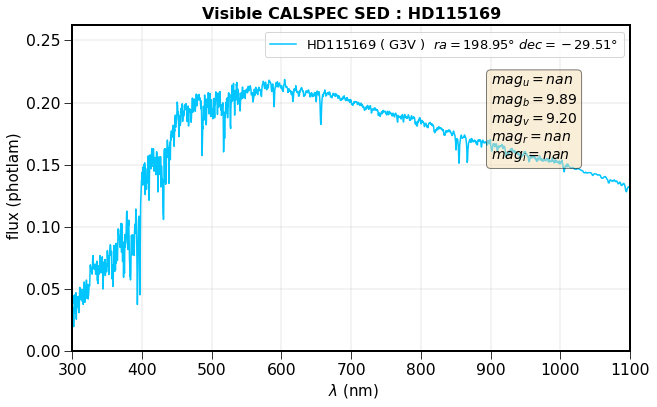

----------- hd142331_stis_002.fits -------------------
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


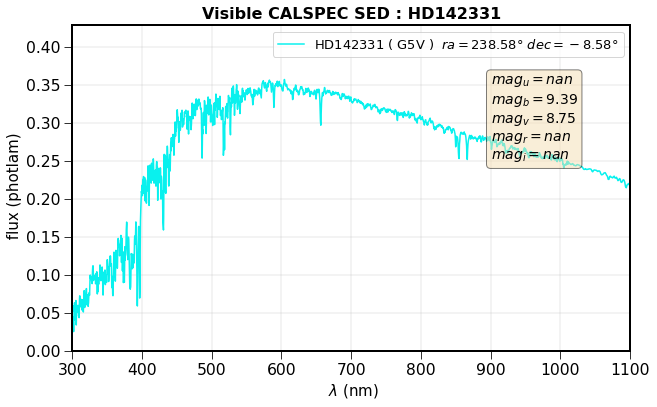

----------- hd14943_stis_005.fits -------------------
Warning, 34 of 7206 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


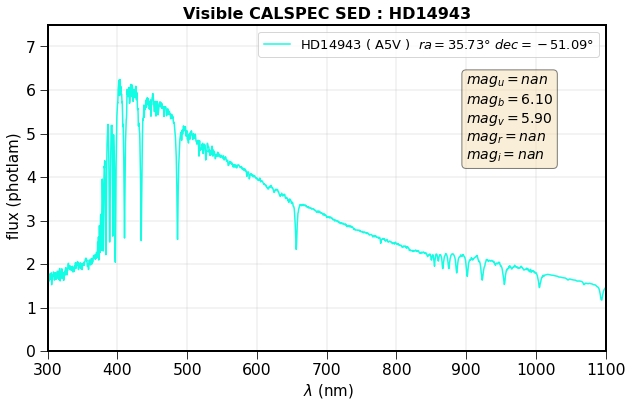

----------- hd160617_stis_005.fits -------------------


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),


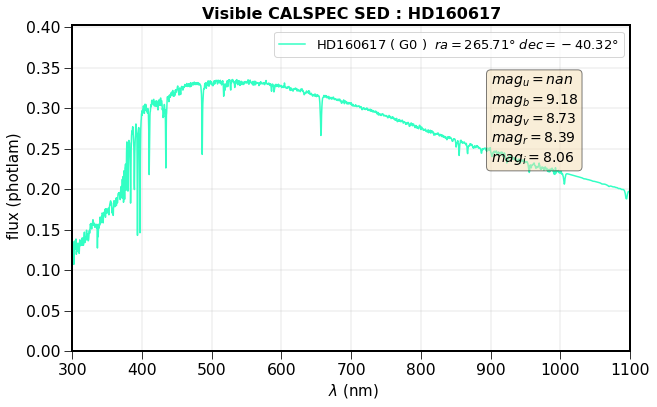

----------- hd167060_stis_002.fits -------------------
Warning, 46 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


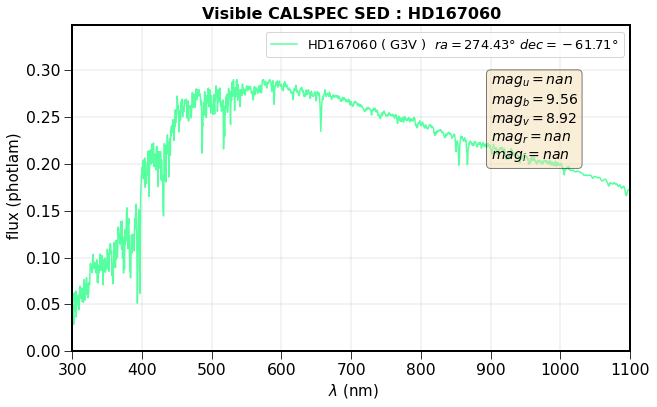

----------- hd185975_stis_005.fits -------------------
Warning, 28 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


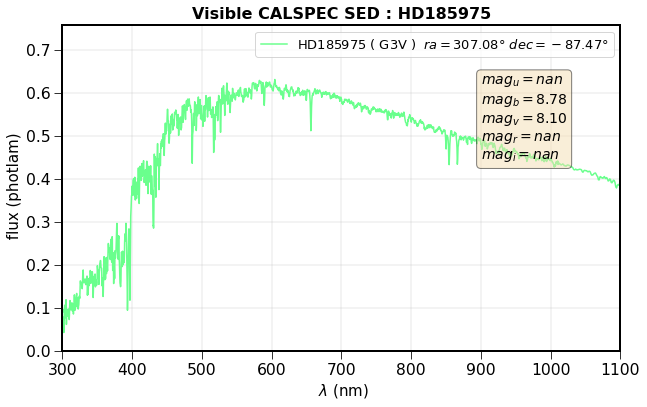

----------- hd200654_stis_005.fits -------------------


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


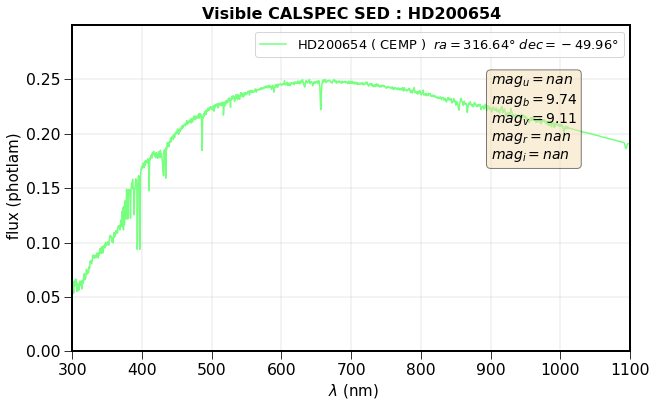

----------- hd205905_stis_005.fits -------------------
Warning, 9 of 6261 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


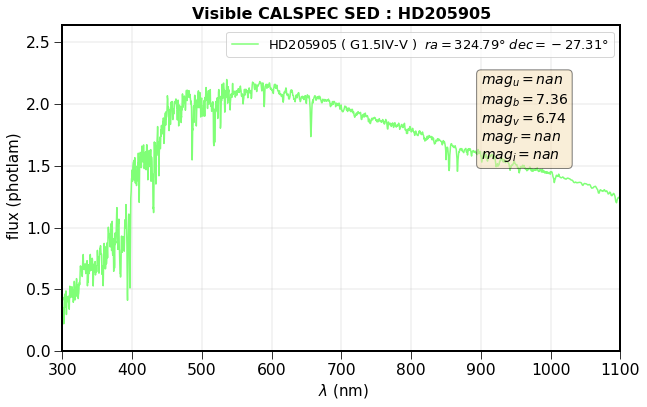

----------- hd2811_stis_002.fits -------------------
Warning, 33 of 7206 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


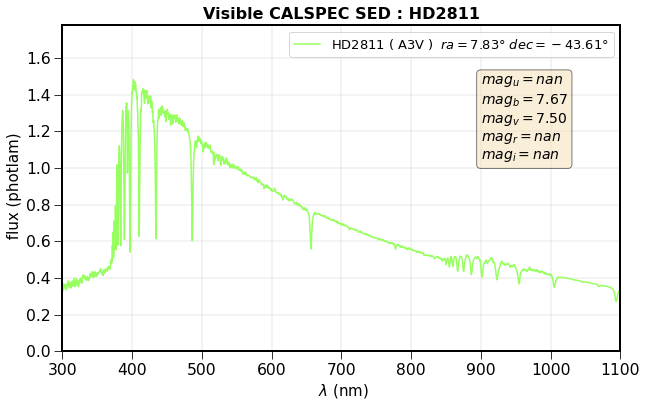

----------- hd37962_stis_005.fits -------------------
Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


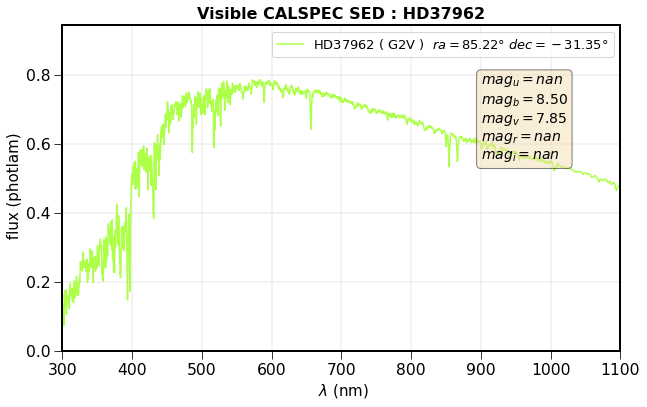

----------- hd38949_stis_005.fits -------------------
Warning, 5 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


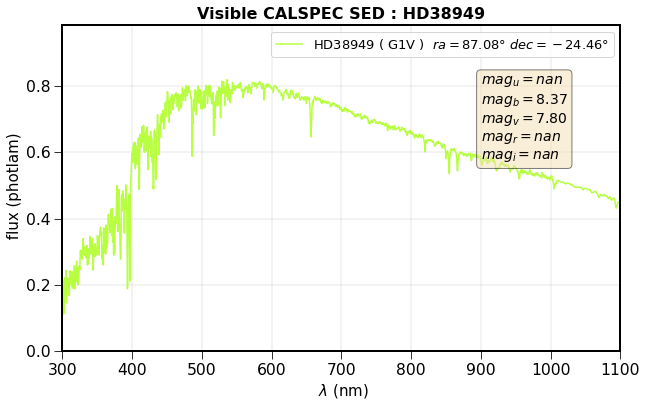

----------- hd60753_stis_004.fits -------------------


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


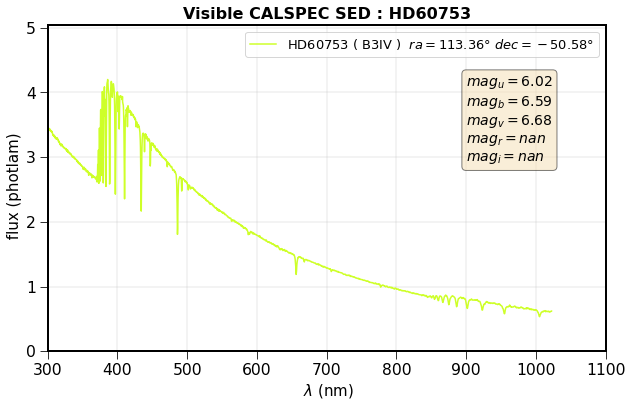

----------- lamlep_stis_005.fits -------------------


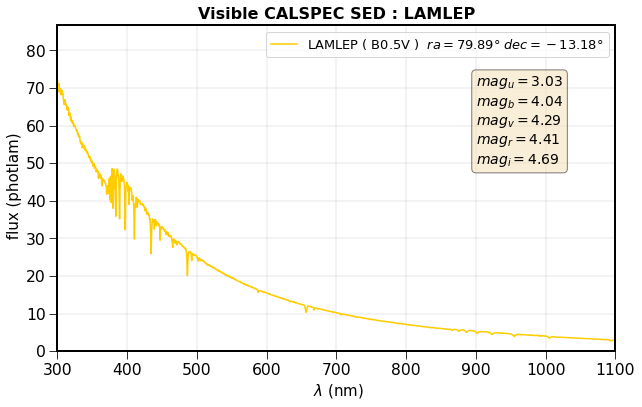

----------- ltt9491_002.fits -------------------


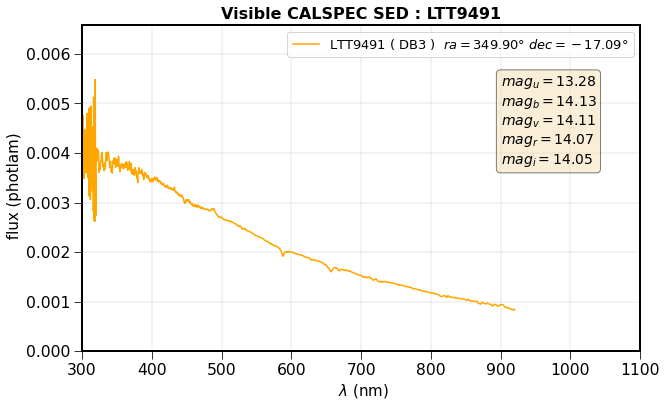

----------- mucol_stis_005.fits -------------------


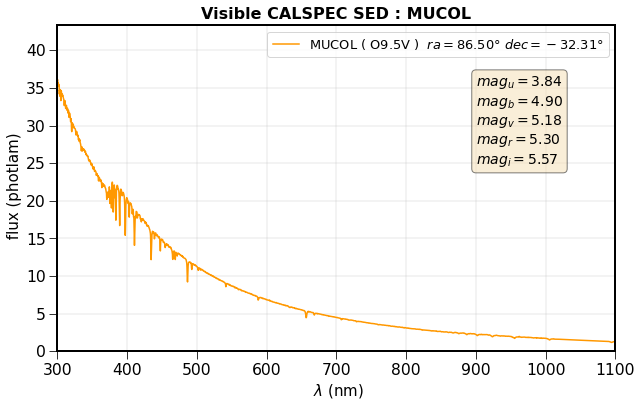

----------- ngc6681_10_stis_001.fits -------------------
Warning, 1 of 2784 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


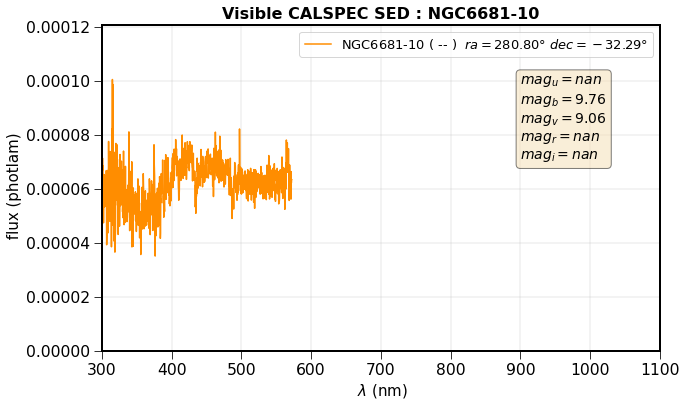

----------- ngc6681_11_stis_001.fits -------------------


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


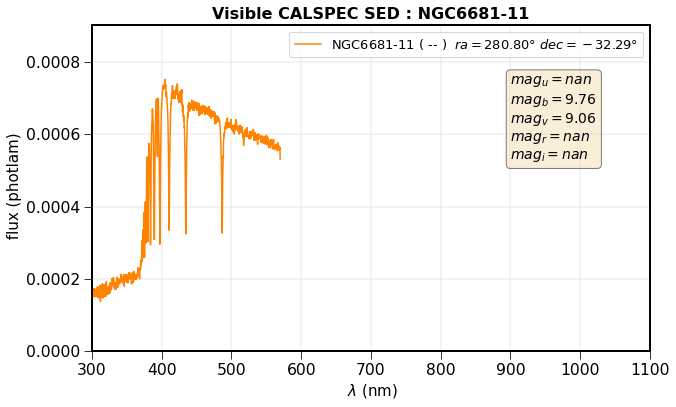

----------- ngc6681_12_stis_001.fits -------------------
Warning, 5 of 2771 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


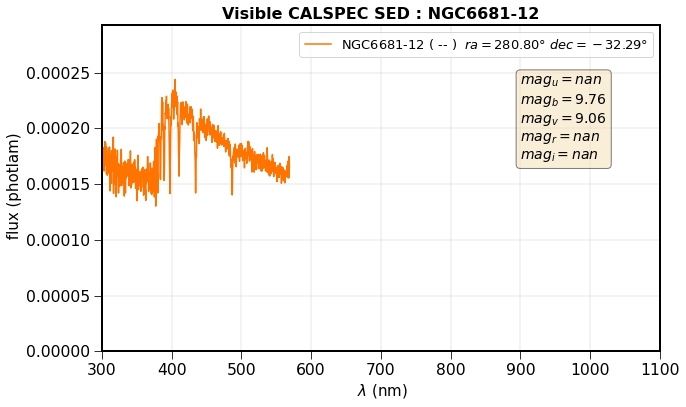

----------- ngc6681_1_stis_001.fits -------------------
Warning, 137 of 2781 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


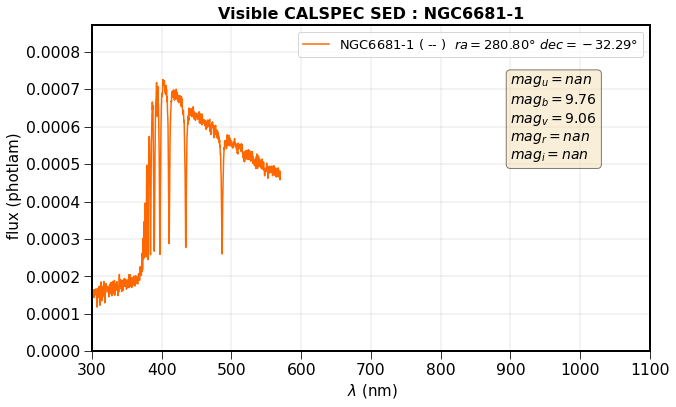

----------- ngc6681_2_stis_001.fits -------------------
Warning, 41 of 2777 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


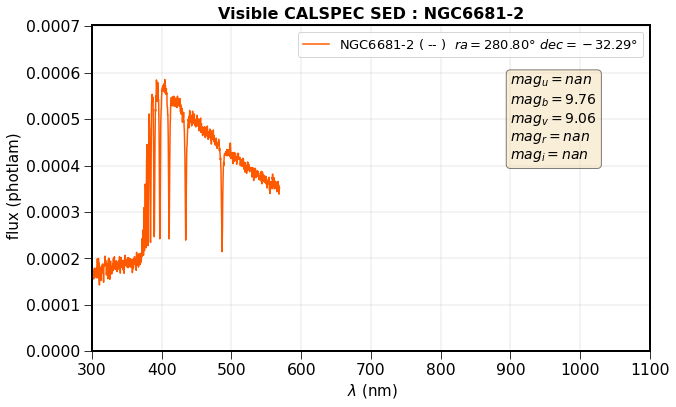

----------- ngc6681_3_stis_001.fits -------------------
Warning, 11 of 2788 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


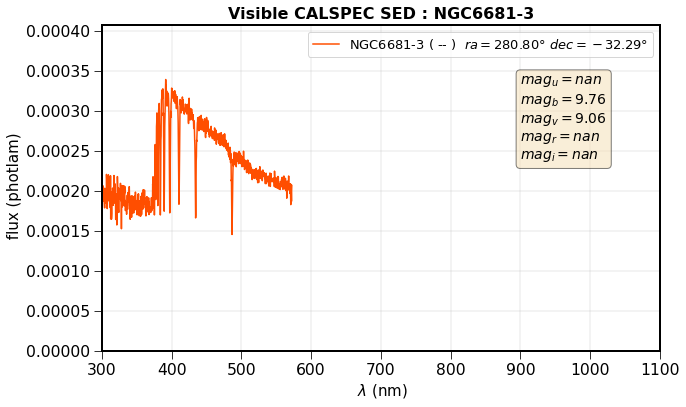

----------- ngc6681_4_stis_001.fits -------------------
Warning, 26 of 2771 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


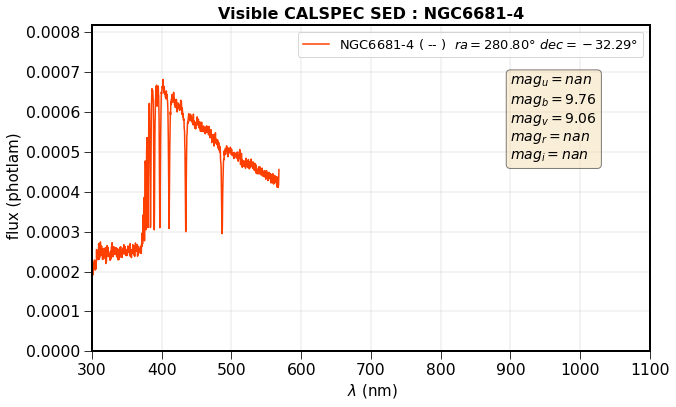

----------- ngc6681_5_stis_001.fits -------------------
Warning, 28 of 2769 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


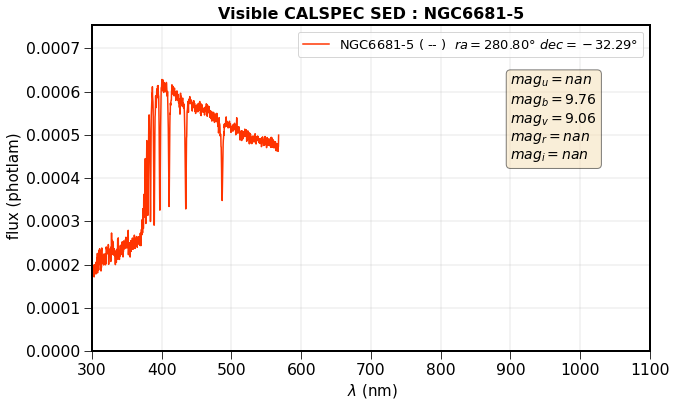

----------- ngc6681_6_stis_001.fits -------------------
Warning, 16 of 2787 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


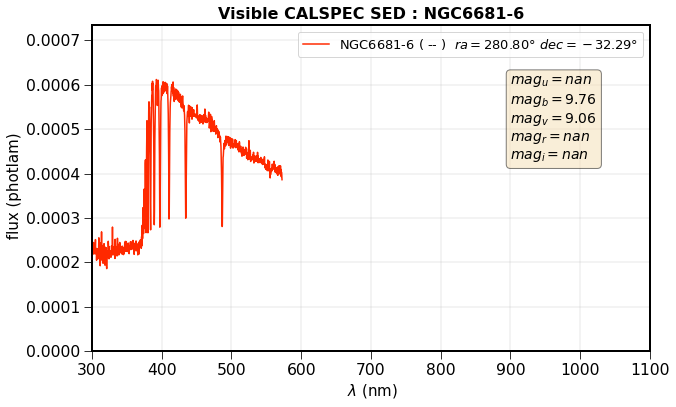

----------- ngc6681_7_stis_001.fits -------------------
Warning, 919 of 2788 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


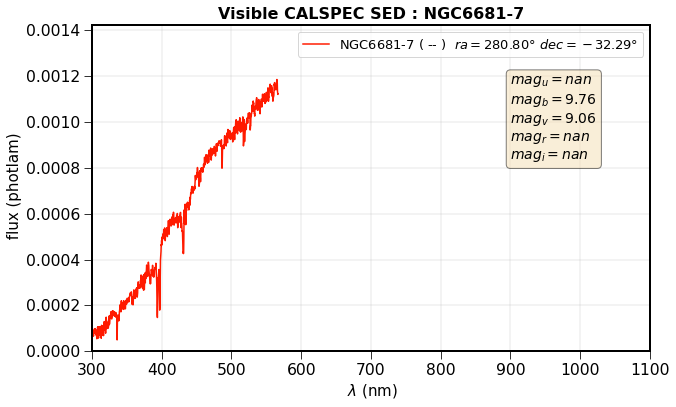

----------- ngc6681_8_stis_001.fits -------------------
Warning, 8 of 2767 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


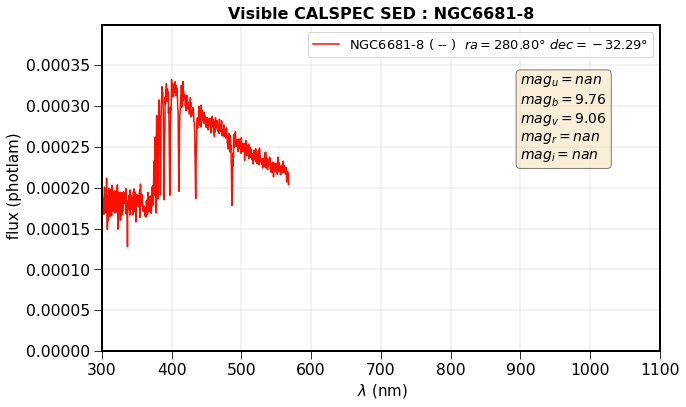

----------- ngc6681_9_stis_001.fits -------------------
Warning, 28 of 2778 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:31: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (t["magR"][idx], ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:32: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (t["magI"][idx], )))


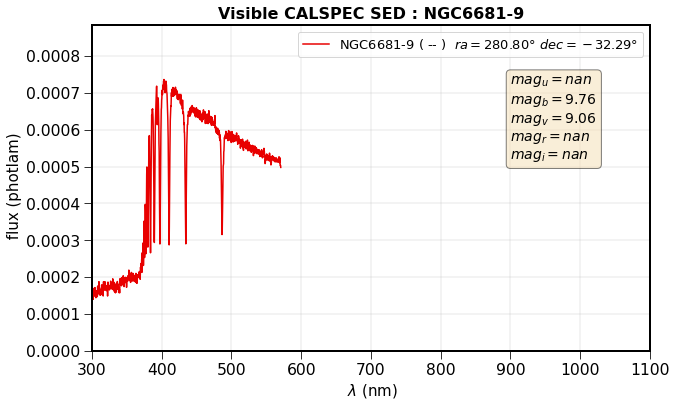

----------- ngc7293_005.fits -------------------


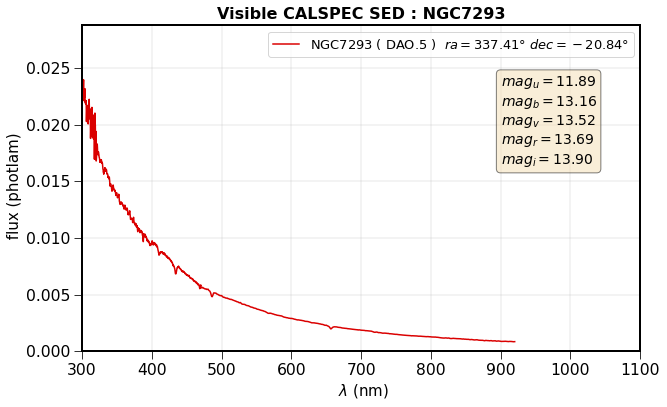

----------- sirius_stis_004.fits -------------------


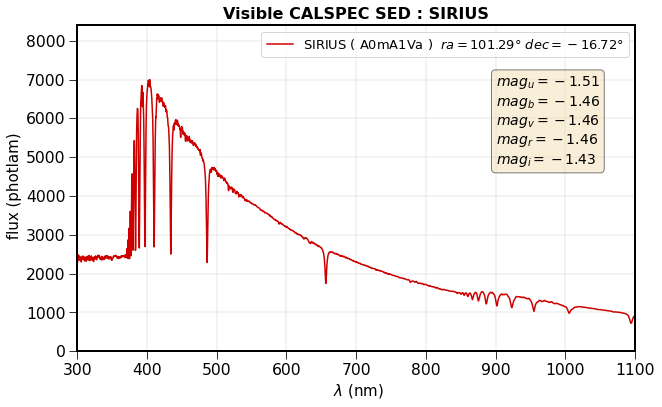

----------- vb8_stiswfcnic_003.fits -------------------
Warning, 116 of 2334 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59515/3243029968.py:28: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (t["magU"][idx], ),


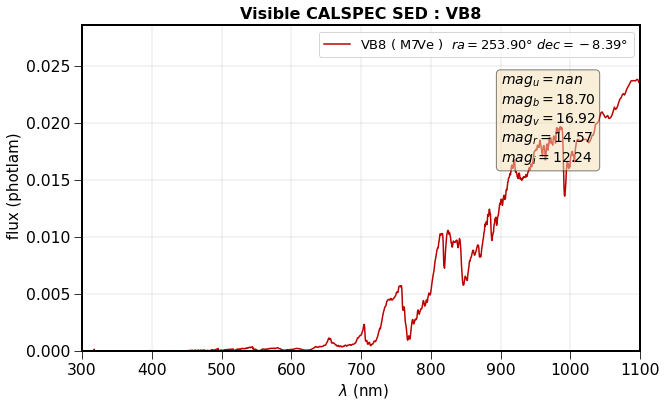

----------- wd1327_083_stiswfc_004.fits -------------------


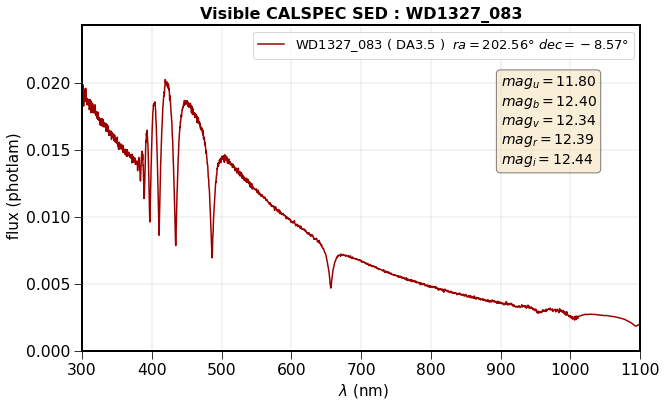

In [34]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        
        print(f"----------- {filename} -------------------")
        
        #if (re.search("^ngc6681",filename) or re.search("ngc7293",filename) or re.search("^sirius",filename)
        #    or re.search("^vb8",filename) or re.search("^wd",filename) or re.search("^wd1327",filename)):
        
        #     print(f"\t !!! SKIP {filename}, please check later what is wrong with this SED")
        #    continue
        
        fig=plt.figure(figsize=(10,6))
        
        ax=fig.add_subplot(111)
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')  
        
        
        label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" ) "+ " $ra={:3.2f}°$".format(t["RA"][idx]) + " $dec={:3.2f}°$".format(t["DEC"][idx])
        ax.plot(spec.wave, spec.flux,color=all_colors[idx],label=label)
        
        textstr = '\n'.join((
        r'$mag_u=%2.2f$' % (t["magU"][idx], ),
        r'$mag_b=%2.2f$' % (t["magB"][idx], ),
        r'$mag_v=%2.2f$' % (t["magV"][idx], ),
        r'$mag_r=%2.2f$' % (t["magR"][idx], ),
        r'$mag_i=%2.2f$' % (t["magI"][idx], )))
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.75, 0.85, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
        
        idx_vis=np.where(np.logical_and(spec.wave>300,spec.wave<1100))[0]
        spec_max=spec.flux[idx_vis].max()
        spec_min=0
        
        
        
        ax.set_ylim(spec_min,spec_max*1.2)
    
    
        ax.set_xlim(300.,1100.)

        ax.legend()
        ax.grid()

        fign="all_viscalspec_spectra_lin.pdf"
        xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
        ylabel=' flux ({})'.format(spec.fluxunits.name)
        ax.set_xlabel(xlabel,fontsize=15)
        ax.set_ylabel(ylabel,fontsize=15)
        ax.set_title("Visible CALSPEC SED : "+ t["OBJNAME"][idx])
        #plt.savefig(fign)
        plt.show()

    idx+=1